# Description of the project

You have been invited to an internship in the marketing analytics department of Yandex.Afisha. The first task: to help marketers reduce costs - abandon unprofitable traffic sources and reallocate the budget.
There is Yandex.Afisha data from June 2017 to the end of May 2018:
server log with data about visits to the Yandex.Afisha website,
unloading all orders for this period,
statistics of advertising expenses.
You will have to study:
how clients use the service,
when they make their first purchases on the site,
how much money does each client bring to the company,
when the cost of attracting a client pays off.
Revenue is measured in conventional units - c.u.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:
# Read
visits = pd.read_csv('visits.zip', index_col=0)
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
visits.columns = ['device', 'session_end_ts', 'source_id', 'session_start_ts', 'uid']
visits['session_end_ts'] =  pd.to_datetime(visits['session_end_ts'], infer_datetime_format=True)
visits['session_start_ts'] =  pd.to_datetime(visits['session_start_ts'], infer_datetime_format=True)
visits.head()

,device,session_end_ts,source_id,session_start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
# Info
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   device            359400 non-null  object        
 1   session_end_ts    359400 non-null  datetime64[ns]
 2   source_id         359400 non-null  int64         
 3   session_start_ts  359400 non-null  datetime64[ns]
 4   uid               359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 16.5+ MB


The visits table contains 5 columns with the number of observations - 359400. This table contains data by device category, start and end dates of the session, identifier of the source of the transition to the site and a unique user number.
In the visits table, we changed the column names to 'device', 'session_end_ts', 'source_id', 'session_start_ts', 'uid' for more convenient subsequent analysis and calculations by columns, and also added date values in the 'session_end_ts' and 'session_start_ts' columns to datetime type.

In [5]:
# Read 
orders = pd.read_csv('orders.csv', index_col=0)
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [6]:
orders.columns = ['buy_ts', 'revenue', 'uid']
orders['buy_ts'] =  pd.to_datetime(orders['buy_ts'], infer_datetime_format=True)
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [7]:
# Info
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.5 MB


The orders table collects data in columns - a unique user number, the date and time of the order, and the order amount. There are 50415 observations in total.
In the orders table, the column names were changed to 'buy_ts', 'revenue', 'uid' for more convenient subsequent analysis and calculations by columns, and the date values in the 'buy_ts' column were converted to the datetime type.

In [8]:
costs = pd.read_csv('costs.csv', index_col=0)
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [9]:
costs.columns = ['source_id', 'date', 'costs']
orders['buy_ts'] =  pd.to_datetime(orders['buy_ts'], infer_datetime_format=True)
costs.head()

,source_id,date,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   date       2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 79.4+ KB


The costs table collects data in columns - advertising source identifier, campaign date, and advertising campaign costs. There are 2542 observations in total.
In the costs table, the column names were changed to 'source_id', 'date', 'costs' for more convenient subsequent analysis and calculations by columns, and the date values in the 'buy_ts' column were converted to datetime type.

In [11]:
visits['session_year']  = visits['session_start_ts'].dt.year
visits['session_month'] = visits['session_start_ts'].dt.month
visits['session_week']  = visits['session_start_ts'].dt.week
visits['session_date'] = visits['session_start_ts'].dt.date
visits.head() 

C:\Users\chern\AppData\Local\Temp\ipykernel_27284\2489940164.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  visits['session_week']  = visits['session_start_ts'].dt.week


,device,session_end_ts,source_id,session_start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [12]:
print('Number of duplicates for the visits table: {}'.format(visits.duplicated().sum()))
print('Number of duplicates for the orders table: {}'.format(orders.duplicated().sum()))
print('Number of duplicates for the costs table: {}'.format(costs.duplicated().sum()))

Number of duplicates for the visits table: 0
Number of duplicates for the orders table: 0
Number of duplicates for the costs table: 0


In [13]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = (
    visits.groupby(['session_year', 'session_week'])
    .agg({'uid': 'nunique'})
    .mean()
)
mau_total = (
    visits.groupby(['session_year', 'session_month'])
    .agg({'uid': 'nunique'})
    .mean()
)

print('Number of unique users per day: {}'.format(int(dau_total)))
print('Number of unique users per week: {}'.format(int(wau_total)))
print('Number of unique users per month: {}'.format(int(mau_total)))

Number of unique users per day: 907
Number of unique users per week: 5716
Number of unique users per month: 23228


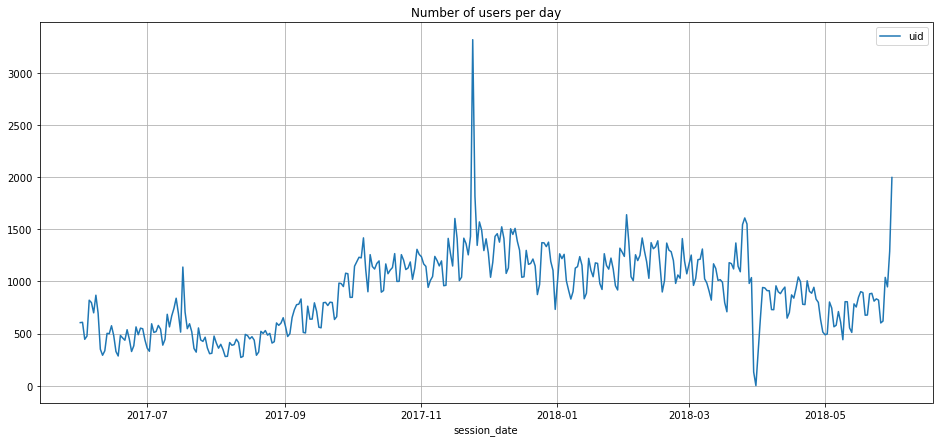

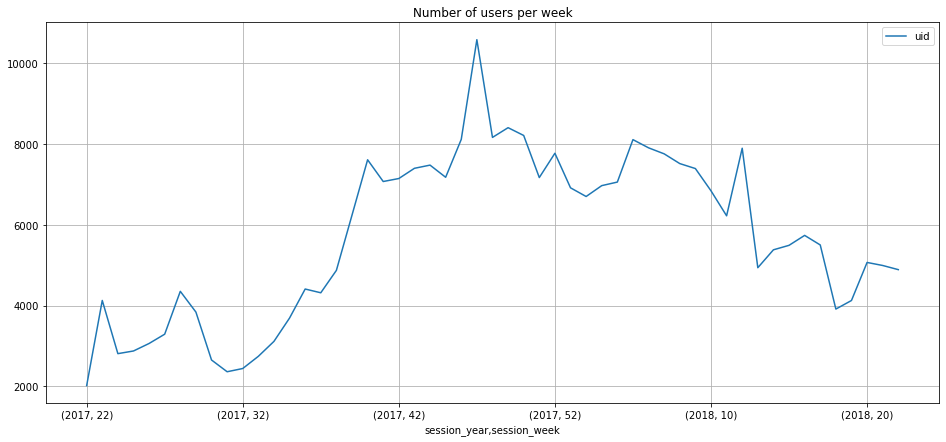

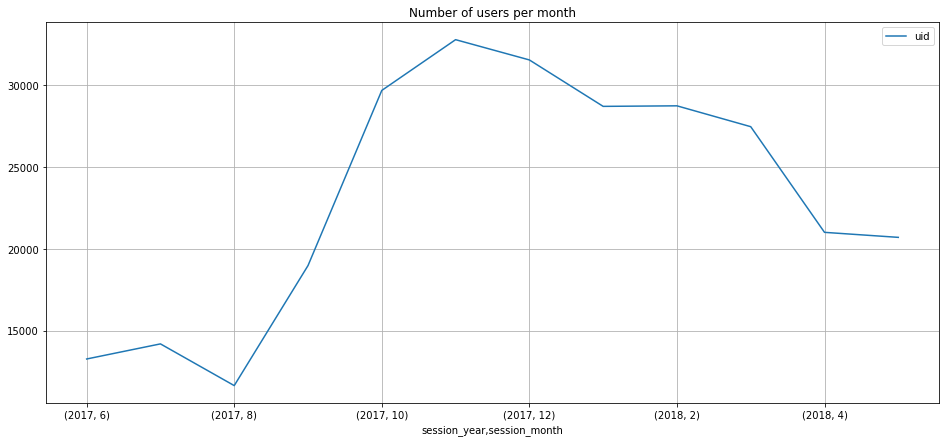

In [14]:
dau_graph = visits.groupby('session_date').agg({'uid': 'nunique'})
dau_graph.plot(y='uid', 
               style='-',
               title = 'Number of users per day',
               figsize=(16,7), 
               grid=True)
wau_graph = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})
wau_graph.plot(y='uid', 
               style='-',
               title = 'Number of users per week',
               figsize=(16,7), 
               grid=True)
mau_graph = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})
mau_graph.plot(y='uid',
               title = 'Number of users per month',
               style='-',
               figsize=(16,7), 
               grid=True)
plt.show()

The graphs show that there are very prominent values at the end of November 2017, where the number of daily users at the end of the month exceeds 3000 people/day. While at the end of March the number of users dropped sharply to 0 users per day.
In general, the “Number of users per month” graph increases from August 2017 to November 2017, after which there is a gradual decrease in the number of users.

In [15]:
session_per_user = visits.groupby(['session_date', 'uid']).agg({'uid': 'count'})
mean_session_per_user = session_per_user.groupby('session_date').agg({'uid':'mean'}).reset_index()
mean_session_per_user.columns = ['session_date', 'mean_session']
mean_session_per_user.head(15)

,session_date,mean_session
0,2017-06-01,1.097521
1,2017-06-02,1.082237
2,2017-06-03,1.071910
3,2017-06-04,1.071429
4,2017-06-05,1.089024
5,2017-06-06,1.097867
6,2017-06-07,1.127325
7,2017-06-08,1.081797
8,2017-06-09,1.086331
9,2017-06-10,1.071429


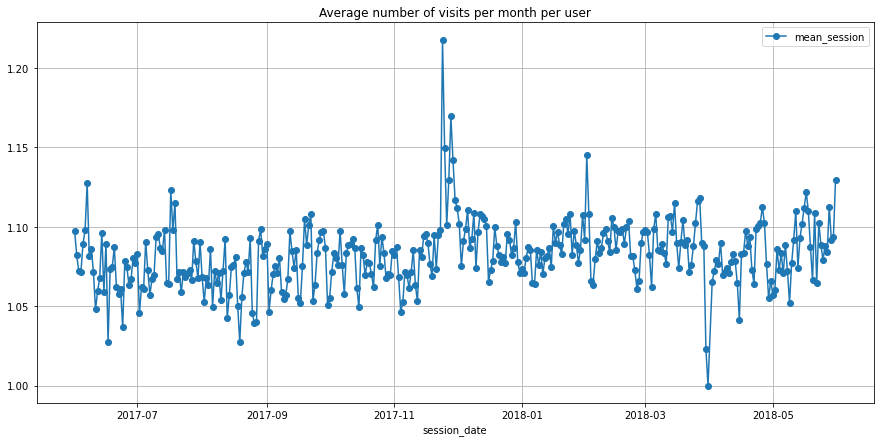

In [16]:
mean_session_per_user.plot(y='mean_session',
                           x='session_date',
                           title='Average number of visits per month per user',
                           style='o-',
                           grid=True,
                           figsize=(15,7))
plt.show()

The graph of "Average number of visits per month per user" is similar to the graph of the number of users per day. Identical peaks are observed at the end of November, as well as a sharp drop in indicators at the end of March.

In [17]:
print('On average, users visit the site per day: {:.2f}'.format(mean_session_per_user['mean_session'].mean()))

On average, users visit the site per day: 1.08


In [18]:
visits['time_spent'] = visits['session_end_ts'] - visits['session_start_ts']
visits['time_spent'] = visits['time_spent'] / np.timedelta64(1, 'm')

In [19]:
visits_under = visits.query('time_spent < 0')
visits_over = visits.query('time_spent > 0')
print('Proportion of values in which the time spent is less than zero: {:.7%}'.format(visits_under.shape[0] / visits_over.shape[0]))
visits = visits_over

Proportion of values in which the time spent is less than zero: 0.0006180%


In [20]:
time_spent = visits.groupby('time_spent').agg({'uid': 'nunique'}).reset_index()
time_spent.columns = ['time_spent', 'uid']

In [21]:
time_spent.head(15)

,time_spent,uid
0,0.316667,868
1,1.000000,47514
2,2.000000,32583
3,3.000000,24618
4,4.000000,19611
5,5.000000,15887
6,6.000000,13417
7,7.000000,11518
8,8.000000,10265
9,9.000000,9094


Duration of a typical user session for the entire period: 9.0


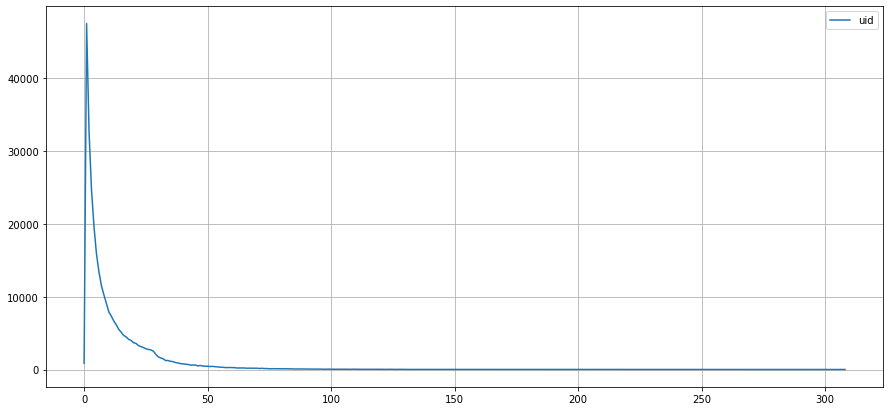

In [22]:
time_spent.plot(y='uid', 
               style='-', 
               figsize=(15,7), 
               grid=True)
print('Duration of a typical user session for the entire period: {}'.format(time_spent['uid'].median()))

The average duration of a typical user session is 9 minutes. This is observed on the graph in that the majority (more than 40,000) of the values are between 0 and 10 minutes. This indicator is rather logical, since during this time the user can theoretically visit the site, as well as make the first purchases on the Yandex.Afisha website.

In [23]:
first_visit_month = visits.groupby(['uid'])['session_date'].min().reset_index()
first_visit_month.columns = ['uid', 'first_visit_month']
visits_activity = visits.merge(first_visit_month, on='uid')

In [24]:
visits_activity['activity_month'] = visits_activity['session_date'].astype('datetime64[M]')
visits_activity['first_activity_month'] = visits_activity['first_visit_month'].astype('datetime64[M]')

In [25]:
visits_activity['cohort_lifetime'] = visits_activity['activity_month'] - visits_activity['first_activity_month']
visits_activity['cohort_lifetime'] = visits_activity['cohort_lifetime'] / np.timedelta64(1, 'M')
visits_activity['cohort_lifetime'] = visits_activity['cohort_lifetime'].round().astype('int')

In [26]:
cohorts = visits_activity.groupby(['first_activity_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [27]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})

In [28]:
cohorts = cohorts.merge(initial_users_count, on='first_activity_month')
cohorts

,first_activity_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,11885,11885
1,2017-06-01,1,900,11885
2,2017-06-01,2,606,11885
3,2017-06-01,3,710,11885
4,2017-06-01,4,777,11885
...,...,...,...,...
73,2018-03-01,1,766,18793
74,2018-03-01,2,480,18793
75,2018-04-01,0,14215,14215
76,2018-04-01,1,675,14215


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.075726,0.050989,0.059739,0.065377,0.067480,0.057720,0.056121,0.050989,0.049727,0.038115,0.043921
2017-07-01,1.0,0.054545,0.050402,0.055645,0.056660,0.046512,0.044059,0.044059,0.037886,0.027315,0.027061,NaN
2017-08-01,1.0,0.074452,0.060451,0.060451,0.047970,0.041459,0.036249,0.037660,0.027133,0.024745,NaN,NaN
2017-09-01,1.0,0.083570,0.067769,0.049322,0.038083,0.036959,0.035372,0.022876,0.022744,NaN,NaN,NaN
2017-10-01,1.0,0.078129,0.050811,0.037811,0.033648,0.031184,0.020775,0.019798,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078183,0.042733,0.037824,0.032593,0.021729,0.020602,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.054668,0.036518,0.030178,0.019453,0.017716,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.057794,0.037817,0.024352,0.019249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.056561,0.024290,0.019184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


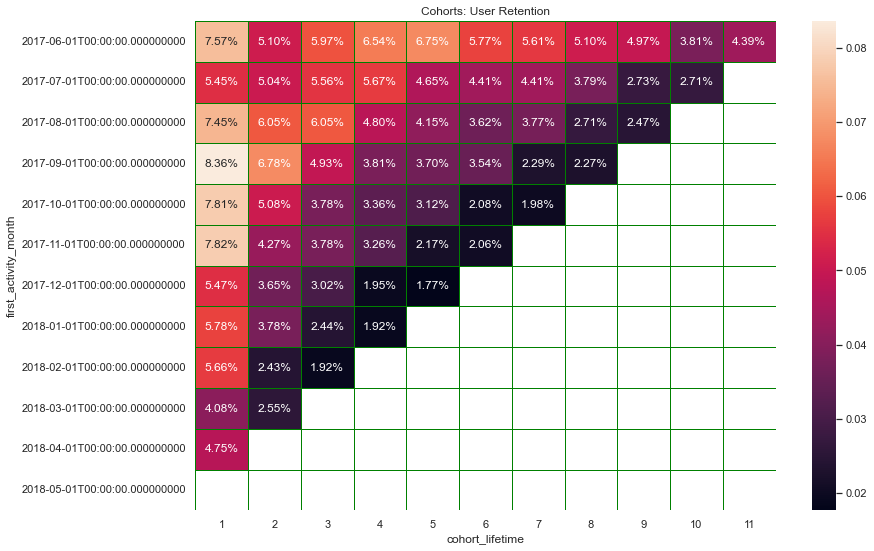

In [29]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(
        index='first_activity_month',
        columns='cohort_lifetime',
        values='retention',
        aggfunc='sum',
        )
display(retention_pivot)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot.drop([0], axis=1), annot=True, fmt='.2%', linewidths=1, linecolor='green');

The Retention Rate indicator shows that in each cohort, with each new month, fewer and fewer people remained (less than 7% of the original users returned to the service). This indicator is subjective and is calculated separately for each service. It can be assumed that 7% and, in general, a downward trend in the number of users of the Yandex.Afisha service is a normal indicator, since this service is specific and people rarely use it and accordingly buy tickets for events.

In [30]:
orders['buy_ts_month'] = orders['buy_ts'].astype('datetime64[M]')

In [31]:
# Let's group the data in the visits table by user and find the date of the user's first visit to the site
first_visit = visits.groupby('uid').agg({'session_start_ts':'min'})
first_visit.columns = ['first_visit_time']

In [32]:
# find the date of the first purchase from the orders table
first_order = orders.groupby('uid').agg({'buy_ts' : 'min'})
first_order.columns = ['first_buy_time']

In [33]:
# Let's combine tables with data about the user's first visit to the site and his first purchase.
orders_visits = first_visit.merge(first_order, on='uid').reset_index()

In [34]:
# Let's find the difference between the date of the first purchase and the date of the user's first visit to the site and express this value in days.
orders_visits['visits_to_purchase_time'] = orders_visits['first_buy_time'] - orders_visits['first_visit_time']
orders_visits['visits_to_purchase_time'] = (pd.to_timedelta(orders_visits['visits_to_purchase_time']) 
                                           / np.timedelta64(1, 'D'))

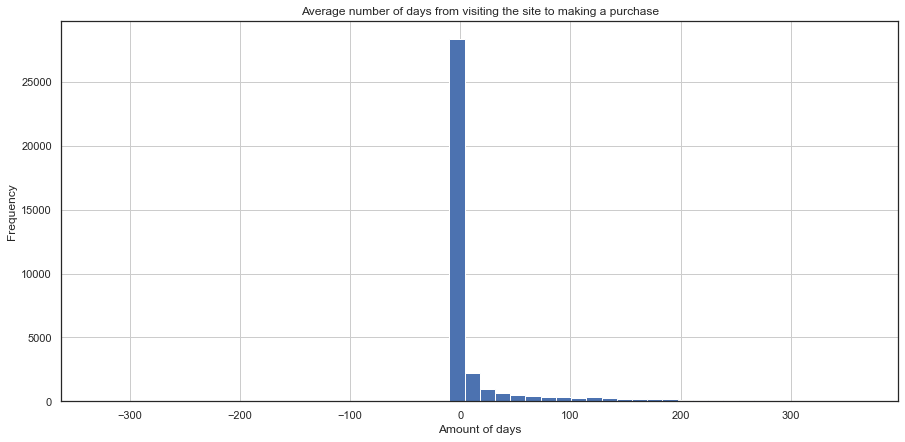

In [35]:
ax_visits = orders_visits['visits_to_purchase_time'].hist(bins=50, figsize=(15,7))
ax_visits.set_title('Average number of days from visiting the site to making a purchase')
ax_visits.set_xlabel('Amount of days')
ax_visits.set_ylabel('Frequency')
plt.show()

In [36]:
print('The median value of days from visiting the site to making a purchase is: {:.2F}'.format(orders_visits['visits_to_purchase_time'].median()))

The median value of days from visiting the site to making a purchase is: 0.01


On the graph of the number of days from the moment of visiting to making a purchase, it is observed that mostly users (more than 30,000 people) make a purchase within a period of up to 50 days. But there are also users whose number of days exceeds 100 days. This could be explained by users comparing offers across different apps/platforms or simply looking at leisure offers as a matter of interest.

In [37]:
# найдём месяц первой покупки
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
first_orders = orders.groupby('uid').agg({'order_month' : 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
orders_first = orders.merge(first_orders, on='uid')
order_count_sum = orders_first.groupby(['uid', 'order_month', 'first_order_month']).agg({'revenue' : ['count', 'sum']}).reset_index()
order_count_sum.columns = ['uid', 'order_month', 'first_order_month', 'orders_count', 'revenue']
order_count_sum['cohort_lifetime'] = order_count_sum['order_month'] - order_count_sum['first_order_month']
order_count_sum['cohort_lifetime'] = order_count_sum['cohort_lifetime'] / np.timedelta64(1, 'M')
order_count_sum['cohort_lifetime'] = round(order_count_sum['cohort_lifetime']).astype('int')
order_count_sum

,uid,order_month,first_order_month,orders_count,revenue,cohort_lifetime
0,313578113262317,2018-01-01,2018-01-01,1,0.55,0
1,1575281904278712,2017-06-01,2017-06-01,2,3.05,0
2,2429014661409475,2017-10-01,2017-10-01,1,73.33,0
3,2464366381792757,2018-01-01,2018-01-01,1,2.44,0
4,2551852515556206,2017-11-01,2017-11-01,2,10.99,0
...,...,...,...,...,...,...
41014,18445147675727495770,2017-11-01,2017-11-01,1,3.05,0
41015,18445407535914413204,2017-09-01,2017-09-01,3,0.88,0
41016,18445601152732270159,2018-03-01,2018-03-01,1,4.22,0
41017,18446156210226471712,2018-02-01,2018-02-01,1,9.78,0


In [38]:
# calculate the number of active users for each cohort
cohorts_orders = order_count_sum.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
cohorts_orders.columns = ['first_order_month', 'uid_count']
order_cohorts = order_count_sum.merge(cohorts_orders, on='first_order_month')
order_cohorts

,uid,order_month,first_order_month,orders_count,revenue,cohort_lifetime,uid_count
0,313578113262317,2018-01-01,2018-01-01,1,0.55,0,3373
1,2464366381792757,2018-01-01,2018-01-01,1,2.44,0,3373
2,4808417689019433,2018-01-01,2018-01-01,1,1.22,0,3373
3,12436904862559956,2018-01-01,2018-01-01,1,0.24,0,3373
4,21801295586117262,2018-01-01,2018-01-01,2,1.22,0,3373
...,...,...,...,...,...,...,...
41014,18376058541393893369,2017-09-01,2017-07-01,1,1.59,2,1923
41015,18376058541393893369,2017-12-01,2017-07-01,1,1.83,5,1923
41016,18386069411854663804,2017-07-01,2017-07-01,1,15.03,0,1923
41017,18404053948371855220,2017-07-01,2017-07-01,1,2.75,0,1923


In [39]:
cohorts_orders

,first_order_month,uid_count
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [40]:
orders_cohorts_pivot = order_cohorts.pivot_table(index='first_order_month', columns='cohort_lifetime', values='orders_count', aggfunc='sum')
orders_cohorts_pivot/cohorts_orders['uid_count']

,0,1,2,3,4,5,6,7,8,9,10,11,12
first_order_month,,,,,,,,,,,,,
2017-06-01,1.163618,0.092044,0.127007,0.087563,0.067281,0.053418,0.062971,0.051586,0.058066,0.043306,0.042179,0.028782,NaN
2017-07-01,1.080573,0.052002,0.087591,0.040294,0.016590,0.020093,0.013917,0.014824,0.015886,0.006793,0.023286,NaN,NaN
2017-08-01,0.757785,0.056162,0.072993,0.031383,0.019585,0.015192,0.011180,0.023125,0.012599,0.013020,NaN,NaN,NaN
2017-09-01,1.449827,0.113885,0.117518,0.063541,0.015438,0.026709,0.024641,0.016602,0.016708,NaN,NaN,NaN,NaN
2017-10-01,2.453782,0.163287,0.118248,0.047269,0.029724,0.025239,0.019621,0.037059,NaN,NaN,NaN,NaN,NaN
2017-11-01,2.379140,0.206448,0.132847,0.081751,0.031336,0.014457,0.023272,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01,2.497281,0.140406,0.147445,0.069353,0.019816,0.025729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.869995,0.116485,0.116058,0.024797,0.017972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,2.024221,0.115445,0.060584,0.027121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
orders_cohorts_pivot = order_cohorts.pivot_table(index='first_order_month', columns='cohort_lifetime', values='orders_count', aggfunc='mean')
orders_cohorts_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.163618,2.901639,3.480000,4.185185,3.318182,3.253731,4.451613,3.702128,3.655172,3.400000,2.133333,1.622642
2017-07-01,1.136765,1.923077,2.105263,1.625000,1.469388,2.157895,1.694444,1.282051,1.380952,1.090909,2.038462,NaN
2017-08-01,1.118978,1.862069,1.886792,1.840909,2.125000,1.937500,1.633333,1.772727,2.421053,1.483871,NaN,NaN
2017-09-01,1.136381,1.684615,1.610000,2.216216,1.288462,1.703125,1.636364,1.513514,1.418605,NaN,NaN,NaN
2017-10-01,1.143779,1.524272,1.317073,1.326087,1.387097,1.430556,1.535714,1.865672,NaN,NaN,NaN,NaN
2017-11-01,1.179368,1.788288,1.516667,1.990566,1.679012,1.229167,1.645161,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.152635,1.849315,1.961165,1.845361,1.720000,1.666667,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.121554,1.964912,1.915663,1.488372,1.733333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.121611,1.881356,1.431034,1.794872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
print('Average number of purchases per customer over 6 months: {:.2f}'.format(orders_cohorts_pivot[5].mean()))

Average number of purchases per customer over 6 months: 1.91


Calculated over 6 months, it turns out that users make slightly less than 2 purchases. In my opinion, this is a fairly large indicator.

In [43]:
first_order_date_by_customers = orders.groupby('uid')['buy_ts'].min().reset_index()
first_order_date_by_customers.columns = ['uid', 'first_order_date']
orders = orders.merge(first_order_date_by_customers, on='uid')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

orders.head(10)

,buy_ts,revenue,uid,buy_ts_month,order_month,first_order_date,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01,2017-06-01,2017-06-01 08:43:00,2017-06-01
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01,2017-06-01,2017-06-01 08:54:00,2017-06-01
7,2017-06-05 14:30:00,7.33,12464626743129688638,2017-06-01,2017-06-01,2017-06-01 08:54:00,2017-06-01
8,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,2017-06-01,2017-06-01 09:22:00,2017-06-01
9,2017-06-02 12:44:00,0.85,3644482766749211722,2017-06-01,2017-06-01,2017-06-01 09:22:00,2017-06-01


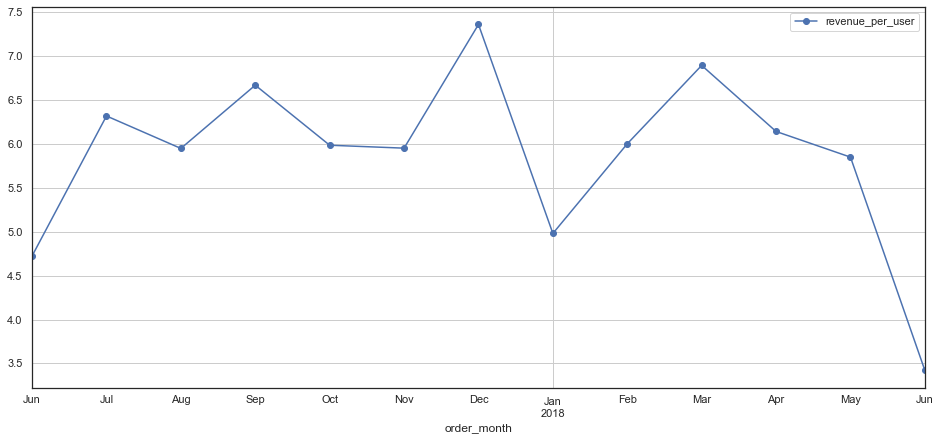

In [44]:
orders_grouped_by_cohorts = orders.groupby(
    ['order_month']
).agg({'revenue': 'sum', 'uid': 'nunique'})
orders_grouped_by_cohorts['revenue_per_user'] = (
    orders_grouped_by_cohorts['revenue']
    / orders_grouped_by_cohorts['uid']
)
revenue_per_user = orders_grouped_by_cohorts.groupby('order_month')['revenue_per_user']
revenue_per_user.head()
orders_grouped_by_cohorts.plot(y='revenue_per_user', 
               style='o-', 
               figsize=(16,7), 
               grid=True)
plt.show()

On the graph we can see that in December the most purchases are made with the highest average bill, which is logically explained by the end of the year, and, accordingly, New Year trees for children, concerts of groups and performances by artists. While in January there are logically fewer tickets for events.

In [45]:
# Выделим месяцы из дат в таблицах с заказами и расходами:
costs['month'] = costs['date'].astype('datetime64[M]')
costs.head()

,source_id,date,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [46]:
# Let's calculate the number of new buyers (n_buyers) for each month:
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [47]:
# Let's build cohorts. Let's add the month of each customer's first purchase to the table with orders:
orders_new = orders.merge(first_orders, on='uid')
del orders_new['first_order_month_y']
orders_new = orders_new.rename(columns={'first_order_month_x':'first_order_month'})
orders_new.head() 

,buy_ts,revenue,uid,buy_ts_month,order_month,first_order_date,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01


In [48]:
# Let's group the table of orders by the month of the first purchase and the month of each order and add up the revenue. Let's reset the index using the reset_index() method:
cohorts = (
    orders_new.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [49]:
# From the point of view of cohort analysis, LTV is the cumulative revenue of a cohort in terms of the number of people. Let's add data to the cohorts table about how many people made a purchase for the first time in each month:
report = cohort_sizes.merge(cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [50]:
# You need to find gross profit by multiplying revenue by marginality. relative indicator. This means it’s more convenient to look at it by “age” cohorts, where the columns show not the month of the order, but the age (age) of the cohort.
margin_rate = 1

report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head(15) 

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4
5,2017-06-01,2023,2017-11-01,1487.92,1487.92,5
6,2017-06-01,2023,2017-12-01,1922.74,1922.74,6
7,2017-06-01,2023,2018-01-01,1176.56,1176.56,7
8,2017-06-01,2023,2018-02-01,1119.15,1119.15,8
9,2017-06-01,2023,2018-03-01,1225.51,1225.51,9


In [51]:
# Finally, let's find LTV. Let's divide the cohorts' gross revenue for each month by the total number of users in each cohort. For clarity, we visualize the cohorts in the form of a summary table:
report['ltv'] = report['gp'] / report['n_buyers']
report

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531
...,...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,13925.76,0,4.660562


In [52]:
output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)

output.fillna('') 
output = output.cumsum(axis = 1)

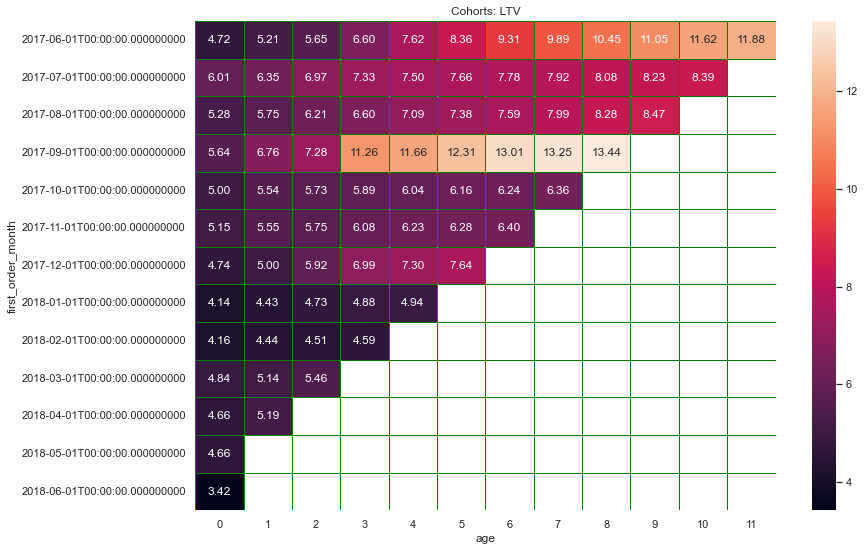

In [53]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: LTV')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='green');

In [54]:
# print('Средний LTV по когортам: {:.2f}'.format(output['ltv'].mean()))
print('Average LTV by cohort for 6 months: {:.2f}'.format(output[6].mean()))

Average LTV by cohort for 6 months: 8.39


The largest total amount of money that one client brings on average from all their purchases is brought by the cohort of September 2017, reaching a peak of 13.4 USD; the smallest amount was brought by the cohorts of January and February 2018. The conclusion about the smallest amount from the previous graph also corresponds to this graph: in January, people less often visit the Yandex.Afisha platform to buy tickets for events.

In [55]:
print('Total marketing expenses: {:.2f}'.format(costs['costs'].sum()))

Total marketing expenses: 329131.62


In [56]:
costs_source = costs.groupby(['source_id', 'month'])['costs'].sum().reset_index()
costs_source.columns = ['source_id', 'costs_month', 'costs']
costs_source

,source_id,costs_month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75
...,...,...,...
79,10,2018-01-01,614.35
80,10,2018-02-01,480.88
81,10,2018-03-01,526.41
82,10,2018-04-01,388.25


In [57]:
fig = px.area(costs_source, x="costs_month", y="costs", color="source_id")
fig.show()

The highest costs are incurred by the 3rd traffic source; the 2nd and 5th traffic sources also bear significant expenses on marketing. Expenses reach their peak values in November-December 2017, just when the shopping schedule is growing. The graph reaches its lowest values in August 2017.

In [58]:
# Sort the table with visitors by the 'session_start_ts' column
visits = visits.sort_values(by='session_start_ts', ascending=True)
visits

,device,session_end_ts,source_id,session_start_ts,uid,session_year,session_month,session_week,session_date,time_spent
308527,desktop,2017-06-01 00:02:00,5,2017-06-01 00:01:00,13890188992670018146,2017,6,22,2017-06-01,1.0
245715,desktop,2017-06-01 00:16:00,3,2017-06-01 00:02:00,16706502037388497502,2017,6,22,2017-06-01,14.0
11727,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,10329302124590727494,2017,6,22,2017-06-01,2.0
69744,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,11627257723692907447,2017,6,22,2017-06-01,11.0
278203,desktop,2017-06-01 00:39:00,4,2017-06-01 00:14:00,17384547788533003069,2017,6,22,2017-06-01,25.0
...,...,...,...,...,...,...,...,...,...,...
209511,desktop,2018-05-31 23:59:00,5,2018-05-31 23:58:00,8899817935489303404,2018,5,22,2018-05-31,1.0
198329,desktop,2018-06-01 00:11:00,3,2018-05-31 23:59:00,3720373600909378583,2018,5,22,2018-05-31,12.0
263781,desktop,2018-06-01 00:25:00,1,2018-05-31 23:59:00,4906562732540547408,2018,5,22,2018-05-31,26.0
299620,desktop,2018-06-01 00:04:00,4,2018-05-31 23:59:00,83872787173869366,2018,5,22,2018-05-31,5.0


In [59]:
# group the visits table by user and display information about the traffic source
visits_grouped = visits.groupby('uid')['source_id'].first().reset_index()
visits_grouped.columns = ['uid', 'first_source_id']

In [60]:
visits_grouped

,uid,first_source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5
...,...,...
207046,18446316582013423015,3
207047,18446403737806311543,5
207048,18446556406699109058,3
207049,18446621818809592527,4


In [61]:
costs

,source_id,date,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [62]:
# Group the table costs by month and traffic source and display the amount of costs
costs_grouped = costs.groupby(['month', 'source_id']).agg({'costs': 'sum'}).reset_index()
costs_grouped.columns = ['month', 'source_id', 'costs']
costs_grouped

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


In [63]:
orders

,buy_ts,revenue,uid,buy_ts_month,order_month,first_order_date,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,2018-05-31 23:50:00,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,2018-05-31 23:50:00,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,2018-05-31 23:54:00,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,2018-05-31 23:56:00,2018-05-01


In [64]:
# join the visits_grouped table to the initial orders table by the 'uid' column
orders = orders.merge(visits_grouped, on='uid')
orders

,buy_ts,revenue,uid,buy_ts_month,order_month,first_order_date,first_order_month,first_source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01 00:27:00,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01 00:29:00,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01 07:58:00,2017-06-01,3
...,...,...,...,...,...,...,...,...
49936,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,2018-05-31 23:50:00,2018-05-01,4
49937,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,2018-05-31 23:50:00,2018-05-01,10
49938,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,2018-05-31 23:54:00,2018-05-01,3
49939,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,2018-05-31 23:56:00,2018-05-01,3


In [65]:
# group the orders table by columns 'first_order_month', 'first_source_id' and display the number of customers
orders_grouped = orders.groupby(['first_order_month', 'first_source_id']).agg({'uid': 'count'}).reset_index()
orders_grouped.columns = ['first_order_month', 'first_source_id', 'n_buyers']
orders_grouped

,first_order_month,first_source_id,n_buyers
0,2017-06-01,1,920
1,2017-06-01,2,630
2,2017-06-01,3,868
3,2017-06-01,4,632
4,2017-06-01,5,1104
...,...,...,...
81,2018-05-01,4,849
82,2018-05-01,5,529
83,2018-05-01,9,62
84,2018-05-01,10,140


In [66]:
# group the orders table by columns 'first_order_month', 'buy_ts_month', 'first_source_id' and display the amount of orders
orders_grouped_revenue = orders.groupby(['first_order_month', 'buy_ts_month', 'first_source_id']).agg({'revenue': 'sum'}).reset_index()
orders_grouped_revenue.columns = ['first_order_month', 'order_month', 'first_source_id', 'revenue_sum']
orders_grouped_revenue

,first_order_month,order_month,first_source_id,revenue_sum
0,2017-06-01,2017-06-01,1,1326.73
1,2017-06-01,2017-06-01,2,1010.58
2,2017-06-01,2017-06-01,3,2760.27
3,2017-06-01,2017-06-01,4,1949.19
4,2017-06-01,2017-06-01,5,1928.60
...,...,...,...,...
512,2018-05-01,2018-05-01,4,3368.32
513,2018-05-01,2018-05-01,5,2067.00
514,2018-05-01,2018-05-01,9,217.49
515,2018-05-01,2018-05-01,10,456.23


In [67]:
# join the orders_grouped table to the orders_grouped_revenue table
grouped_table = orders_grouped.merge(orders_grouped_revenue, on=['first_order_month', 'first_source_id'])

In [68]:
# let's calculate gp, age and ltv indicators by sources and cohorts
margin_rate = 1
grouped_table['gp'] = grouped_table['revenue_sum'] * margin_rate
grouped_table['age'] = (
    grouped_table['order_month'] - grouped_table['first_order_month']
) / np.timedelta64(1, 'M')
grouped_table['age'] = grouped_table['age'].round().astype('int') 
grouped_table['ltv'] = grouped_table['gp'] / grouped_table['n_buyers']
grouped_table.head()

,first_order_month,first_source_id,n_buyers,order_month,revenue_sum,gp,age,ltv
0,2017-06-01,1,920,2017-06-01,1326.73,1326.73,0,1.442098
1,2017-06-01,1,920,2017-07-01,421.09,421.09,1,0.457707
2,2017-06-01,1,920,2017-08-01,393.23,393.23,2,0.427424
3,2017-06-01,1,920,2017-09-01,422.88,422.88,3,0.459652
4,2017-06-01,1,920,2017-10-01,682.96,682.96,4,0.742348


In [69]:
# let's calculate cac and romi indicators by cohorts and sources
output_table = grouped_table.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round()

output_table.fillna('')
grouped_table = grouped_table.merge(costs_grouped, left_on=['first_source_id', 'order_month'], right_on=['source_id', 'month'])
grouped_table['cac'] = grouped_table['costs'] / grouped_table['n_buyers']
grouped_table['romi'] = grouped_table['ltv'] / grouped_table['cac']
grouped_table

,first_order_month,first_source_id,n_buyers,order_month,revenue_sum,gp,age,ltv,month,source_id,costs,cac,romi
0,2017-06-01,1,920,2017-06-01,1326.73,1326.73,0,1.442098,2017-06-01,1,1125.61,1.223489,1.178676
1,2017-06-01,1,920,2017-07-01,421.09,421.09,1,0.457707,2017-07-01,1,1072.88,1.166174,0.392486
2,2017-07-01,1,421,2017-07-01,1207.98,1207.98,0,2.869311,2017-07-01,1,1072.88,2.548409,1.125923
3,2017-06-01,1,920,2017-08-01,393.23,393.23,2,0.427424,2017-08-01,1,951.81,1.034576,0.413139
4,2017-07-01,1,421,2017-08-01,175.31,175.31,1,0.416413,2017-08-01,1,951.81,2.260831,0.184186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,2017-10-01,10,239,2018-04-01,4.16,4.16,6,0.017406,2018-04-01,10,388.25,1.624477,0.010715
511,2017-11-01,10,171,2018-04-01,6.36,6.36,5,0.037193,2018-04-01,10,388.25,2.270468,0.016381
512,2018-02-01,10,137,2018-04-01,0.49,0.49,2,0.003577,2018-04-01,10,388.25,2.833942,0.001262
513,2018-03-01,10,224,2018-04-01,7.21,7.21,1,0.032188,2018-04-01,10,388.25,1.733259,0.018571


In [70]:
output_grouped_data = grouped_table.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

output_grouped_data.fillna('') 
output_grouped_data

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.687446,0.084713,0.123544,0.125264,0.092253,0.060521,0.075187,0.057667,0.051315,0.054747,0.069276,0.055257
2017-07-01,0.737316,0.125629,0.132135,0.033741,0.019277,0.014746,0.014531,0.012847,0.020789,0.025701,0.026113,NaN
2017-08-01,0.669392,0.037113,0.029536,0.021939,0.024018,0.016186,0.014524,0.035595,0.039287,0.018987,NaN,NaN
2017-09-01,0.683779,0.111748,0.049768,0.273712,0.039968,0.057281,0.079653,0.051299,0.057444,NaN,NaN,NaN
2017-10-01,0.769396,0.078647,0.032432,0.027630,0.027967,0.034176,0.020117,0.029289,NaN,NaN,NaN,NaN
2017-11-01,0.708933,0.046247,0.036687,0.060332,0.026471,0.013873,0.021575,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.611547,0.047355,0.154035,0.204033,0.072118,0.082249,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.464590,0.030718,0.039110,0.040121,0.011351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.564578,0.045069,0.013152,0.012196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


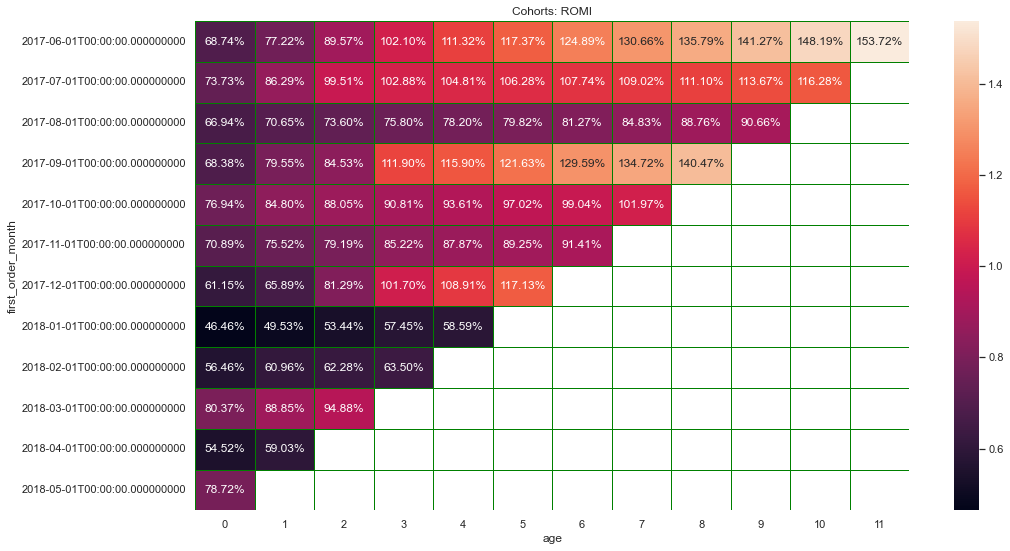

In [71]:
output_grouped_data = output_grouped_data.cumsum(axis = 1)
sns.set(style='white')
plt.figure(figsize=(16, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(output_grouped_data, annot=True, fmt='.2%', linewidths=1, linecolor='green');

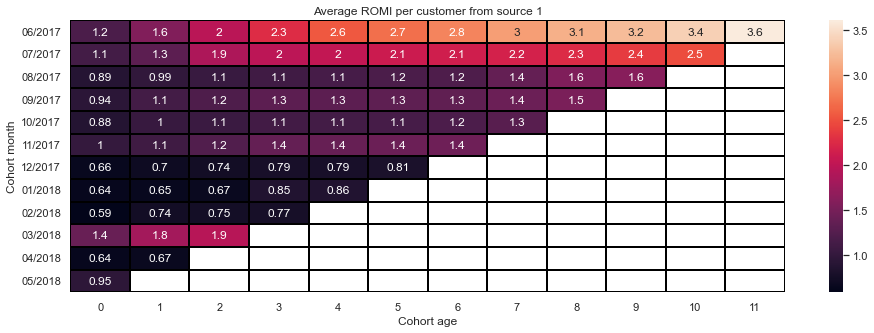

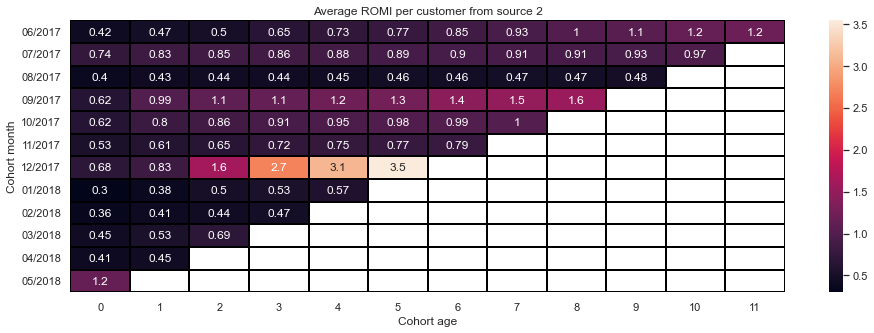

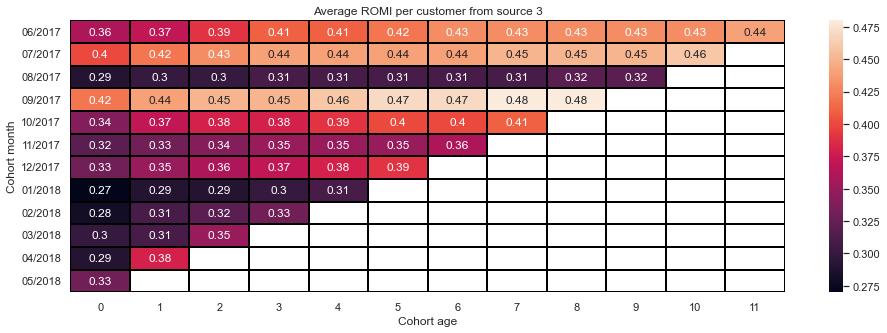

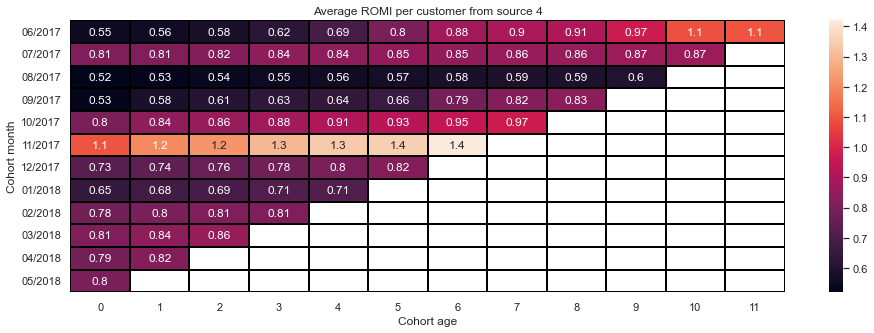

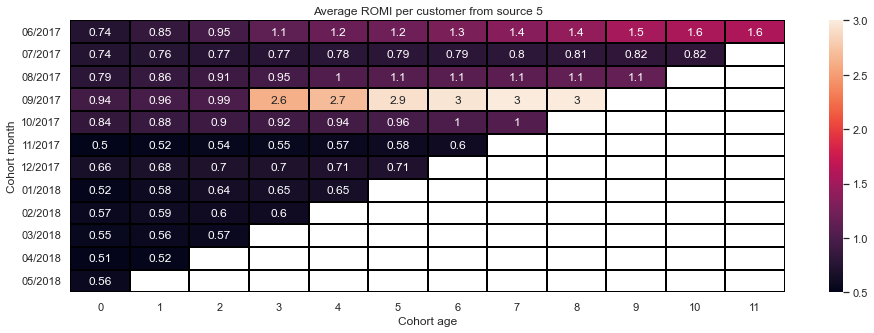

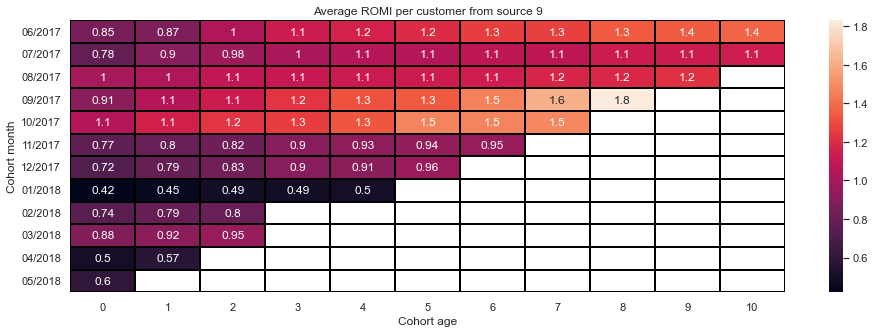

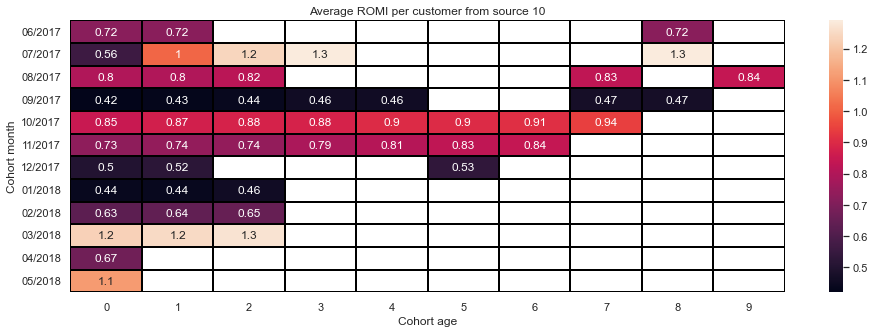

In [72]:
sources = grouped_table['source_id'].unique()
for source in sources:
    plt.figure(figsize=(16, 5))
 
    romi_by_sources = (grouped_table[grouped_table['source_id'] == source]
              .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean'))
    romi_by_sources.index = romi_by_sources.index.strftime("%m/%Y")
 
    sns.heatmap(romi_by_sources.cumsum(axis=1).round(2), annot=True, linewidths=0.2, linecolor='black')
 
    plt.title('Average ROMI per customer from source {}'.format(source))
    plt.xlabel('Cohort age')
    plt.ylabel('Cohort month')


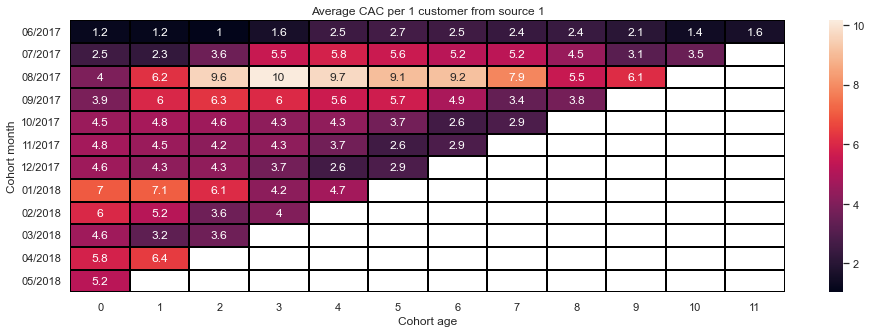

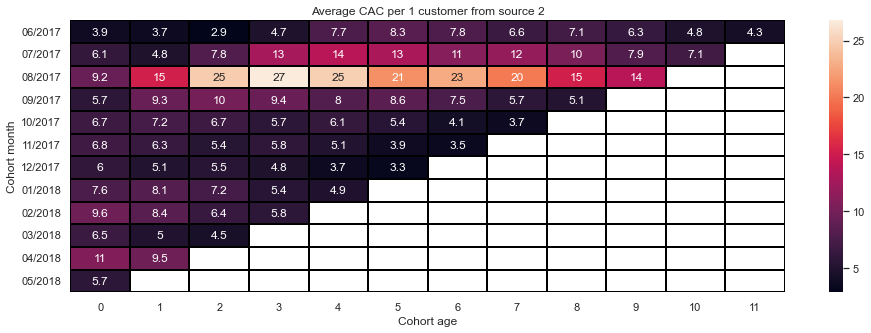

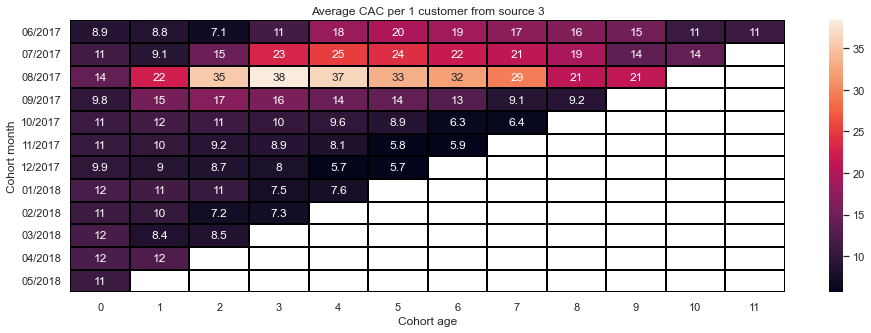

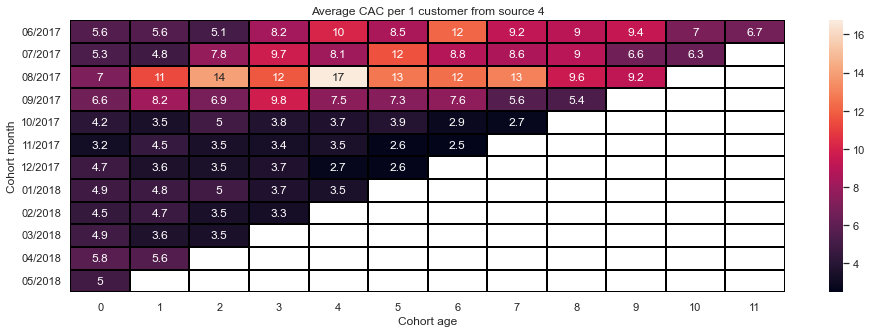

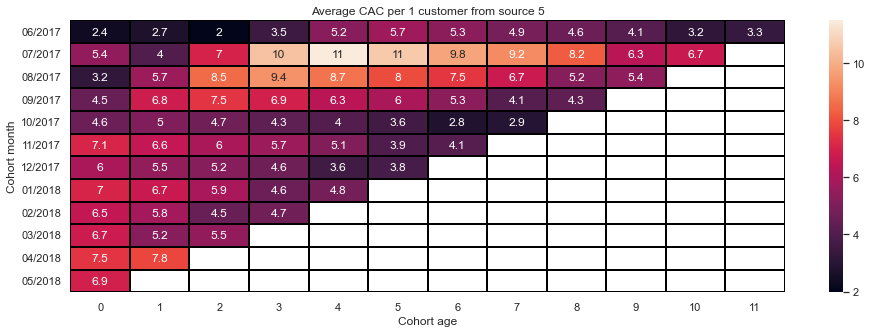

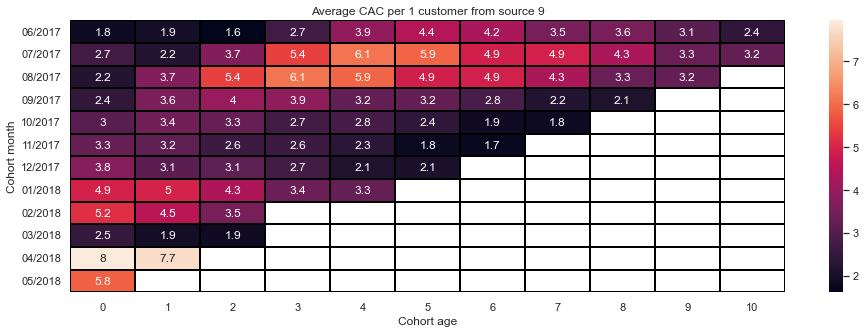

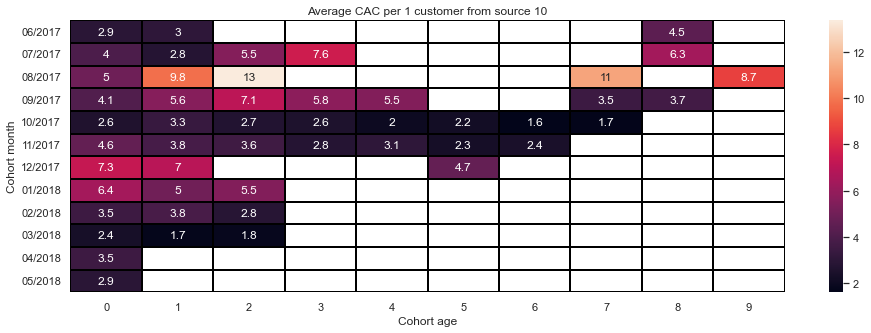

In [73]:
for source in sources:
    plt.figure(figsize=(16, 5))
 
    cac_by_sources = (grouped_table[grouped_table['source_id'] == source]
              .pivot_table(index='first_order_month', columns='age', values='cac', aggfunc='mean'))
    cac_by_sources.index = cac_by_sources.index.strftime("%m/%Y")
 
    sns.heatmap(cac_by_sources.round(2), annot=True, linewidths=0.2, linecolor='black')
 
    plt.title('Average CAC per 1 customer from source {}'.format(source))
    plt.xlabel('Cohort age')
    plt.ylabel('Cohort month')

In [74]:
grouped_data = grouped_table.groupby(['source_id', 'first_order_month'])['ltv', 'cac', 'romi'].agg({'ltv':'mean', 'cac':'mean', 'romi':'mean'}).reset_index()
grouped_data.columns = ['source_id', 'first_order_month', 'ltv_mean', 'cac_mean', 'romi_mean']
grouped_data

C:\Users\chern\AppData\Local\Temp\ipykernel_27284\1472108728.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,source_id,first_order_month,ltv_mean,cac_mean,romi_mean
0,1,2017-06-01,0.478310,1.887072,0.300475
1,1,2017-07-01,0.730916,4.255595,0.225116
2,1,2017-08-01,0.892813,7.732274,0.162026
3,1,2017-09-01,0.748435,5.050834,0.170532
4,1,2017-10-01,0.698988,3.973713,0.159514
...,...,...,...,...,...
79,10,2018-01-01,0.966597,5.630694,0.151836
80,10,2018-02-01,0.755766,3.395474,0.215004
81,10,2018-03-01,0.985015,1.971012,0.421905
82,10,2018-04-01,2.378091,3.529545,0.673767


In [75]:
grouped_data_1 = grouped_table.groupby('source_id')['ltv', 'cac', 'romi'].agg({'ltv':'mean', 'cac':'mean', 'romi':'mean'}).reset_index()
grouped_data_1.columns = ['source_id', 'ltv_mean', 'cac_mean', 'romi_mean']
grouped_data_1

C:\Users\chern\AppData\Local\Temp\ipykernel_27284\4174258567.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,source_id,ltv_mean,cac_mean,romi_mean
0,1,0.927297,4.490195,0.230343
1,2,1.048019,8.374092,0.165111
2,3,0.647779,13.970382,0.058345
3,4,0.709985,6.480791,0.136099
4,5,0.843411,5.711579,0.151033
5,9,0.557548,3.543232,0.162830
6,10,0.764381,4.481180,0.199824


In [76]:
fig = px.area(grouped_data, x='first_order_month', y="romi_mean", color="source_id")
fig.show()

Based on the results of the study, in my opinion, marketers should pay attention to the ROMI metric, as it shows the return on costs. On the ROMI chart by source, the highest value is observed for source 1. The first cohort shows the highest values; it paid for itself in the first month. In general, it paid off by the end of the period by 3.6 times. In sources 2, 3, 4, 5 and 10, for the majority of cohorts, the costs did not pay off, which indicates ineffective investments in marketing, as well as low income from activities. Marketers should pay attention to sources 1 and 9, since cohorts based on this source pay off for the most part.
As can be seen from the CAC graphs for different traffic sources, the cohort 08/2017 has the highest indicators.
For traffic sources 2, 3 and 4, CAC indicators are greatly overestimated; for them, you can make an exception and reduce costs for them, and invest the unallocated budget in traffic sources 1 and 9. In this case, the company can attract new users and, accordingly, increase potential revenues.

Based on the results of the study, we can conclude that costs, as well as income, are growing, starting in August, ending with a peak value in December. It is possible that there are largely inexplicable, prominent values at play here at the end of December; they can only be explained by the fact that in December there is a great demand for events, New Year trees, pre-New Year concerts, etc. This is a logical explanation, but it cannot be verified without additional information.

To analyze the most promising group of clients, let's take the ROMI indicator. The most promising cohorts are June, September and December, as they pay for themselves in 4 months. The fact is that the company began to increase its momentum starting at the end of October, as we can see from the increase in marketing costs and sales revenue. Expenses have increased, the number of new clients has also increased, but it takes 4 months to pay off, so the income did not have time to “catch up” with the costs.